In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-prediction/infolimpioavanzadoTarget.csv


In [2]:
df = pd.read_csv('/kaggle/input/stock-market-prediction/infolimpioavanzadoTarget.csv')

In [3]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [4]:
df.shape

(7781, 1285)

In [6]:
df.isnull().sum()


date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [7]:
data_new = df[['date','open', 'high', 'low', 'close','adjclose' ,'volume']]
data_new

,date,open,high,low,close,adjclose,volume
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800
...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100


In [8]:
data_new.isnull().sum()


date        0
open        0
high        0
low         0
close       0
adjclose    0
volume      0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


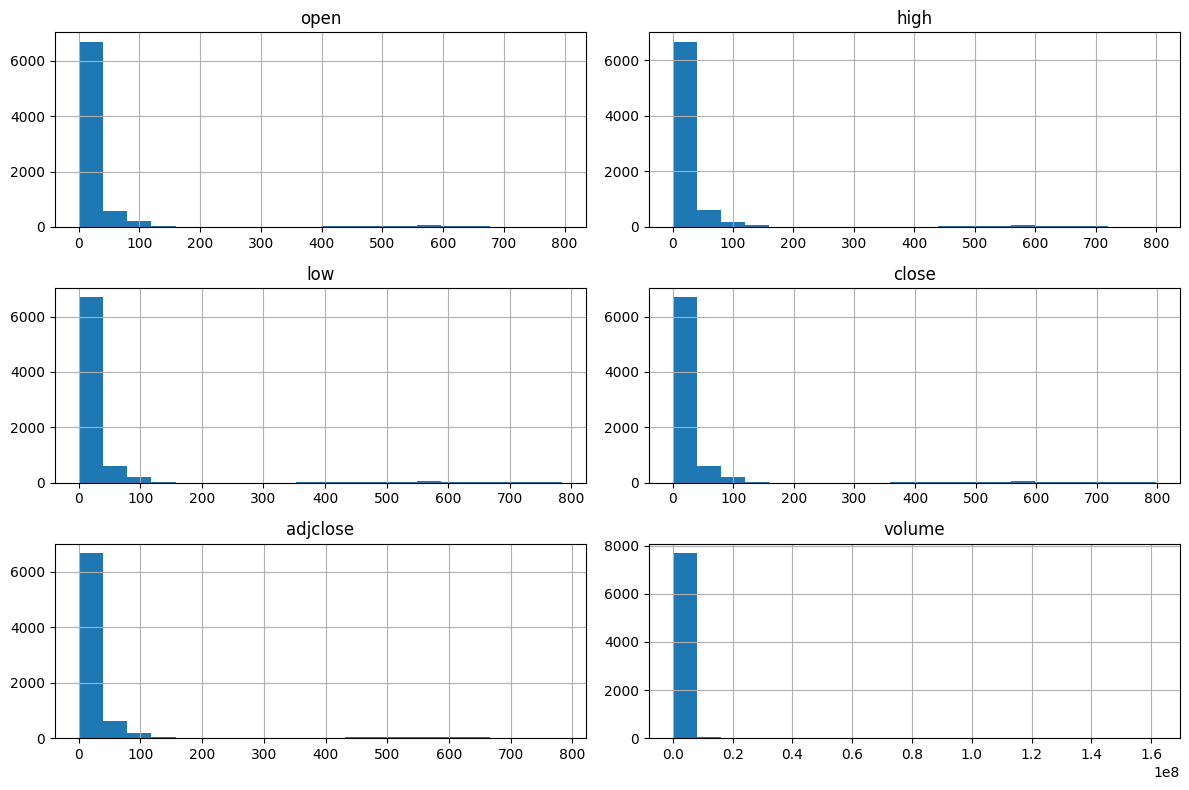

In [26]:
import matplotlib.pyplot as plt

# Select numerical columns for histogram
numerical_columns = ['open', 'high', 'low', 'close', 'adjclose', 'volume']

# Plot histograms for each numerical column
data_new[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


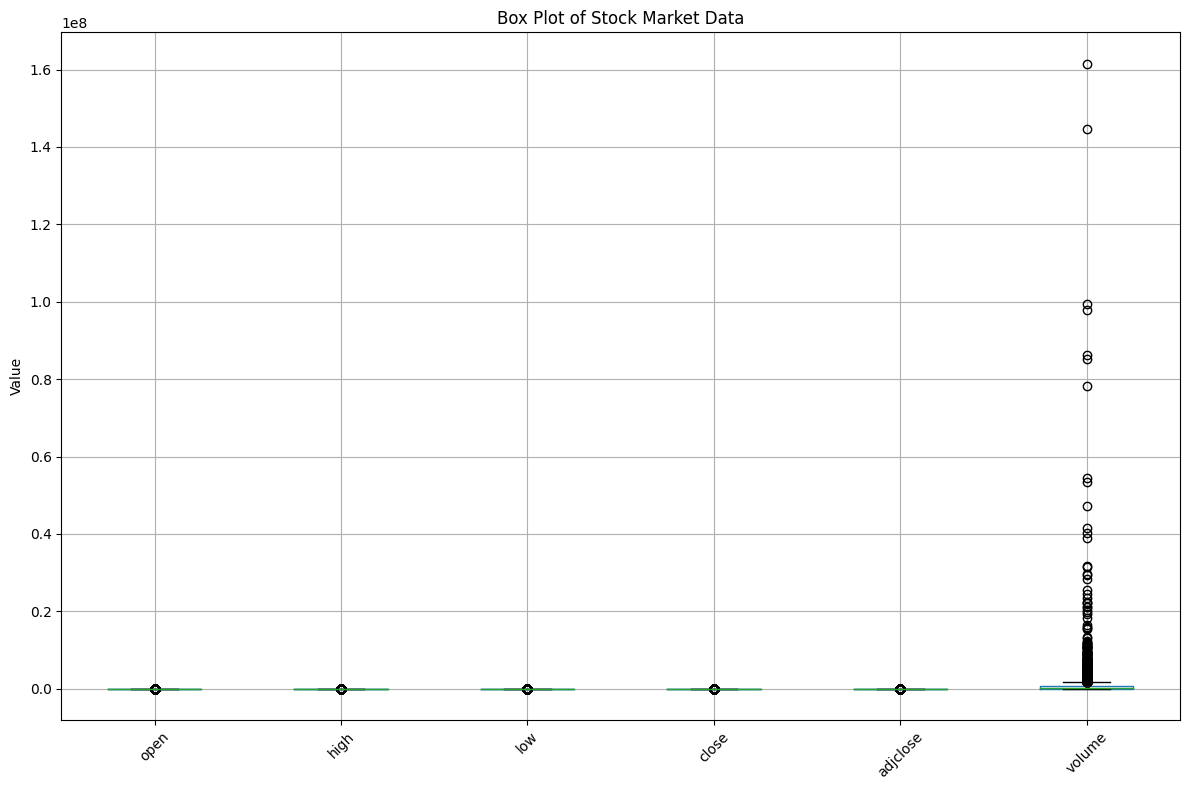

In [27]:
import matplotlib.pyplot as plt

# Select numerical columns for box plot
numerical_columns = ['open', 'high', 'low', 'close', 'adjclose', 'volume']

# Plot box plots for each numerical column
data_new[numerical_columns].boxplot(figsize=(12, 8))
plt.title('Box Plot of Stock Market Data')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
data_new.loc[:, "tomorrow"] = data_new["open"].shift(-1)

# Calculate the mode of the "tomorrow" column excluding NaN values
mode_tomorrow = data_new["tomorrow"].mode()[0]  # [0] to access the first mode value if multiple modes exist

# Replace NaN values in the "tomorrow" column with the mode value
data_new.loc[:, "tomorrow"] = data_new["tomorrow"].fillna(mode_tomorrow)

# Now you can proceed with your analysis or modeling using the updated data
data_new


,date,open,high,low,close,adjclose,volume,tomorrow,target
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,17.700001,False
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,17.580000,False
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,16.650000,False
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,16.219999,False
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,15.680000,False
...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,23.350000,True
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,23.450001,True
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,23.330000,False
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,23.680000,True


In [19]:
data_new.loc[:, "target"] = data_new["tomorrow"] > data_new["open"].astype(float)
data_new

,date,open,high,low,close,adjclose,volume,tomorrow,target
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,17.700001,False
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,17.580000,False
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,16.650000,False
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,16.219999,False
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,15.680000,False
...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,23.350000,True
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,23.450001,True
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,23.330000,False
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,23.680000,True


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = data_new[['open', 'high', 'low', 'close','adjclose' ,'volume']]
y = data_new['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7636480411046885


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = data_new[['open', 'high', 'low', 'close','adjclose','volume']]
y = data_new['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5568400770712909


In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = data_new[['open', 'high', 'low', 'close','adjclose','volume']]
y = data_new['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7411689145793192


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = data_new[['open', 'high', 'low', 'close','adjclose','volume']]
y = data_new['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5549132947976878


So the model Which is giving best accuracy is RandomForest